In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy.signal import medfilt
import glob, os
from mi_modulo import *


In [4]:


# Ruta donde están los .ts
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\als"

def cargar_filtrar_ts(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None)
    df.columns = [
        "Elapsed_Time",
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Swing_%", "Right_Swing_%",
        "Left_Stance", "Right_Stance",
        "Left_Stance_%", "Right_Stance_%",
        "Double_Support", "Double_Support_%"
    ]
    df = df[df["Elapsed_Time"] > 20].reset_index(drop=True)
    for col in df.columns.drop("Elapsed_Time"):
        df[col] = medfilt(df[col], kernel_size=3)
    return df

def matriz_correlacion(df):
    cols = [
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Stance", "Right_Stance",
        "Double_Support"
    ]
    return df[cols].corr()

def procesar_grupo(folder_path):
    archivos = glob.glob(os.path.join(folder_path, "*.ts"))
    if len(archivos) == 0:
        raise FileNotFoundError(f"No se encontraron archivos .ts en {folder_path}")
    
    matrices = []
    for archivo in archivos:
        df = cargar_filtrar_ts(archivo)
        corr = matriz_correlacion(df)
        matrices.append(corr)
    
    mean_corr = sum(matrices) / len(matrices)
    return mean_corr

# ---- Ejecutar ----
mean_corr_als = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (ALS):")
print(mean_corr_als)


Matriz de correlación promedio (ALS):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.739462    0.438200     0.268328   
Right_Stride       0.739462      1.000000    0.257363     0.338546   
Left_Swing         0.438200      0.257363    1.000000     0.176888   
Right_Swing        0.268328      0.338546    0.176888     1.000000   
Left_Stance        0.861569      0.764673    0.162178     0.299005   
Right_Stance       0.709638      0.876115    0.263275     0.092592   
Double_Support     0.665802      0.581529    0.092471    -0.012612   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.861569      0.709638        0.665802  
Right_Stride       0.764673      0.876115        0.581529  
Left_Swing         0.162178      0.263275        0.092471  
Right_Swing        0.299005      0.092592       -0.012612  
Left_Stance        1.000000      0.732533        0.747091  
Right_Stance       0.732533      1.000000

In [5]:
import seaborn as sns

<Axes: >

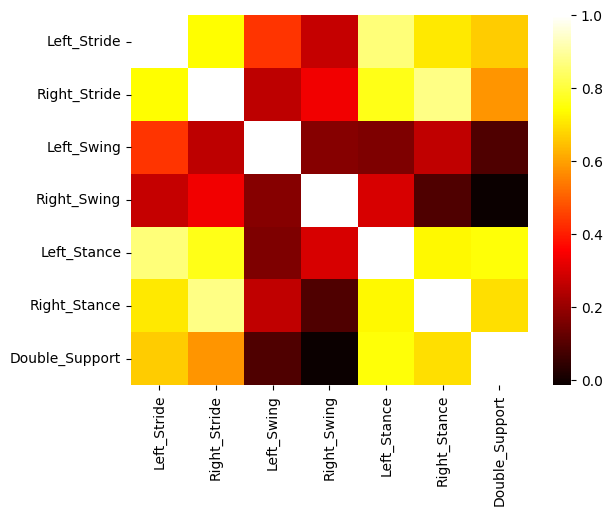

In [5]:
sns.heatmap(mean_corr_als,cmap='hot')

<Axes: >

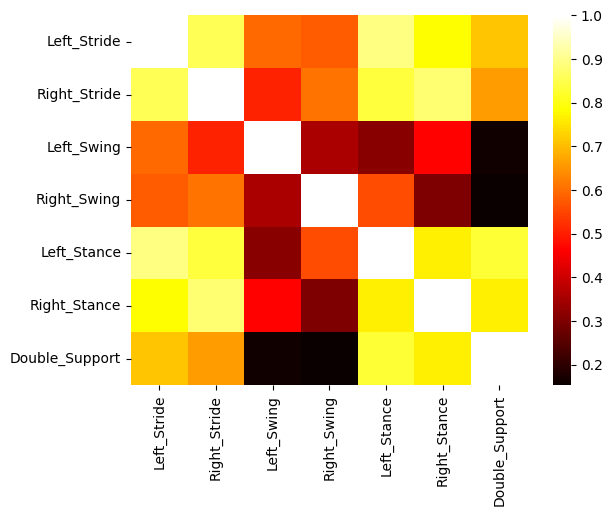

In [9]:
sns.heatmap(mean_corr_control,cmap='hot')

In [6]:

# Ruta donde están los .ts
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\control"

def cargar_filtrar_ts(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None)
    df.columns = [
        "Elapsed_Time",
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Swing_%", "Right_Swing_%",
        "Left_Stance", "Right_Stance",
        "Left_Stance_%", "Right_Stance_%",
        "Double_Support", "Double_Support_%"
    ]
    df = df[df["Elapsed_Time"] > 20].reset_index(drop=True)
    for col in df.columns.drop("Elapsed_Time"):
        df[col] = medfilt(df[col], kernel_size=3)
    return df

def matriz_correlacion(df):
    cols = [
        "Left_Stride", "Right_Stride",
        "Left_Swing", "Right_Swing",
        "Left_Stance", "Right_Stance",
        "Double_Support"
    ]
    return df[cols].corr()

def procesar_grupo(folder_path):
    archivos = glob.glob(os.path.join(folder_path, "*.ts"))
    if len(archivos) == 0:
        raise FileNotFoundError(f"No se encontraron archivos .ts en {folder_path}")
    
    matrices = []
    for archivo in archivos:
        df = cargar_filtrar_ts(archivo)
        corr = matriz_correlacion(df)
        matrices.append(corr)
    
    mean_corr = sum(matrices) / len(matrices)
    return mean_corr

# ---- Ejecutar ----
mean_corr_control = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (control):")
print(mean_corr_control)


Matriz de correlación promedio (control):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.855592    0.594524     0.579700   
Right_Stride       0.855592      1.000000    0.504198     0.607758   
Left_Swing         0.594524      0.504198    1.000000     0.357662   
Right_Swing        0.579700      0.607758    0.357662     1.000000   
Left_Stance        0.892827      0.836193    0.314516     0.560109   
Right_Stance       0.782789      0.880193    0.467217     0.302061   
Double_Support     0.710373      0.661886    0.161515     0.153537   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.892827      0.782789        0.710373  
Right_Stride       0.836193      0.880193        0.661886  
Left_Swing         0.314516      0.467217        0.161515  
Right_Swing        0.560109      0.302061        0.153537  
Left_Stance        1.000000      0.762617        0.829775  
Right_Stance       0.762617      1.00

Matriz de correlación promedio (huntington):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.671385    0.575449     0.409625   
Right_Stride       0.671385      1.000000    0.404611     0.463886   
Left_Swing         0.575449      0.404611    1.000000     0.200514   
Right_Swing        0.409625      0.463886    0.200514     1.000000   
Left_Stance        0.821538      0.657882    0.225297     0.425090   
Right_Stance       0.572987      0.803705    0.371300     0.107495   
Double_Support     0.537105      0.436332    0.088902    -0.103615   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.821538      0.572987        0.537105  
Right_Stride       0.657882      0.803705        0.436332  
Left_Swing         0.225297      0.371300        0.088902  
Right_Swing        0.425090      0.107495       -0.103615  
Left_Stance        1.000000      0.528938        0.681757  
Right_Stance       0.528938      1

<Axes: >

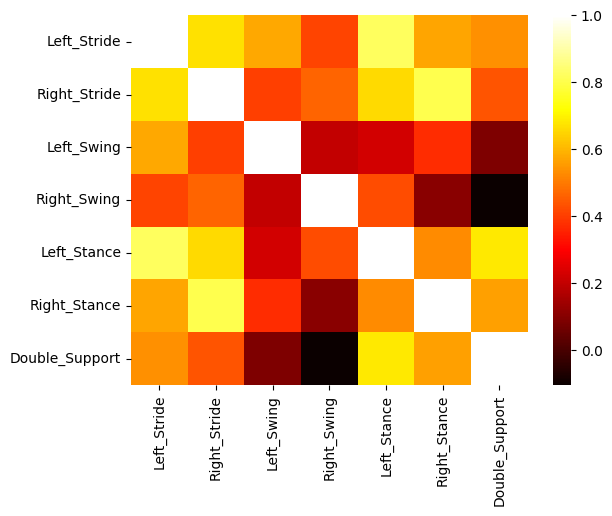

In [7]:
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\hunt"
mean_corr_hunt = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (huntington):")
print(mean_corr_hunt);
sns.heatmap(mean_corr_hunt,cmap='hot')

Matriz de correlación promedio (park):
                Left_Stride  Right_Stride  Left_Swing  Right_Swing  \
Left_Stride        1.000000      0.675566    0.526716     0.394333   
Right_Stride       0.675566      1.000000    0.423476     0.469131   
Left_Swing         0.526716      0.423476    1.000000     0.416311   
Right_Swing        0.394333      0.469131    0.416311     1.000000   
Left_Stance        0.822496      0.605328    0.141598     0.299192   
Right_Stance       0.596826      0.799494    0.284410     0.074311   
Double_Support     0.580280      0.365069   -0.053203    -0.147052   

                Left_Stance  Right_Stance  Double_Support  
Left_Stride        0.822496      0.596826        0.580280  
Right_Stride       0.605328      0.799494        0.365069  
Left_Swing         0.141598      0.284410       -0.053203  
Right_Swing        0.299192      0.074311       -0.147052  
Left_Stance        1.000000      0.572734        0.770121  
Right_Stance       0.572734      1.00000

Text(0.5, 1.0, 'Parkinson')

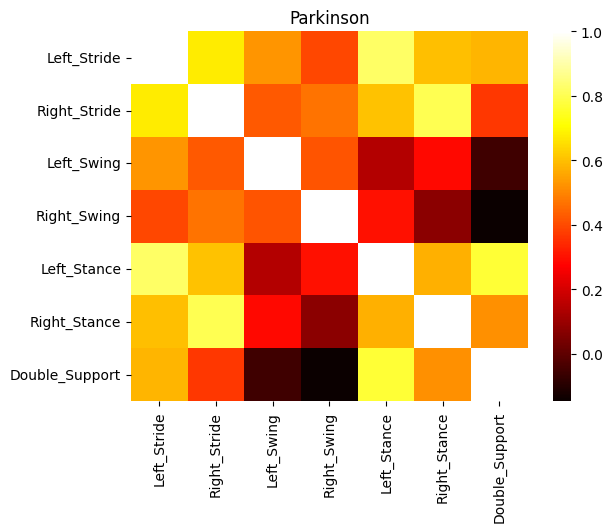

In [8]:
path_grupo = r"C:\Users\mafig\OneDrive\modelos Gait\park"
mean_corr_park = procesar_grupo(path_grupo)

print("Matriz de correlación promedio (park):")
print(mean_corr_park);
sns.heatmap(mean_corr_park,cmap='hot')
plt.title('Parkinson')

- Que el script no contenga errores
- Que los resultados del script sean reproducibles, ie que puedan ser reproducibles en cualquier computadora
- El orden del código
- La lógica del código
- La inferencia empleada para los parámetros utilizados, tales como thresholds para filtrado de matriz, elección de thresholds para selección de alguna banda específica (alfa, beta, delta, etc.)
- Los métodos utilizados, ie, si para construir la matriz de conectividad se utilizó coherencia espectral, PLV o correlación, que haya una razón de ello
- Los resultados mostrados, tales como mapas de calor, grafos 2D, grafos 3D, el mostrar comunidades, hubs, nodos proporcionales al grado, filtrado de matriz de
- Que el análisis haya sido aplicado a cada uno de los ensayos/archivos del dataset

# Matriz de correlación

In [36]:
#Matriz de correlación promedio de Control
mean_corr_control

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.855592,0.594524,0.579700,0.892827,0.782789,0.710373
Right_Stride,0.855592,1.000000,0.504198,0.607758,0.836193,0.880193,0.661886
Left_Swing,0.594524,0.504198,1.000000,0.357662,0.314516,0.467217,0.161515
Right_Swing,0.579700,0.607758,0.357662,1.000000,0.560109,0.302061,0.153537
Left_Stance,0.892827,0.836193,0.314516,0.560109,1.000000,0.762617,0.829775
Right_Stance,0.782789,0.880193,0.467217,0.302061,0.762617,1.000000,0.762679
Double_Support,0.710373,0.661886,0.161515,0.153537,0.829775,0.762679,1.000000


In [37]:
#Matriz de correlación promedio de ALS
mean_corr_als

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.739462,0.438200,0.268328,0.861569,0.709638,0.665802
Right_Stride,0.739462,1.000000,0.257363,0.338546,0.764673,0.876115,0.581529
Left_Swing,0.438200,0.257363,1.000000,0.176888,0.162178,0.263275,0.092471
Right_Swing,0.268328,0.338546,0.176888,1.000000,0.299005,0.092592,-0.012612
Left_Stance,0.861569,0.764673,0.162178,0.299005,1.000000,0.732533,0.747091
Right_Stance,0.709638,0.876115,0.263275,0.092592,0.732533,1.000000,0.694197
Double_Support,0.665802,0.581529,0.092471,-0.012612,0.747091,0.694197,1.000000


In [38]:
#Matriz de correlación promedio de Parkinson
mean_corr_park

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.675566,0.526716,0.394333,0.822496,0.596826,0.580280
Right_Stride,0.675566,1.000000,0.423476,0.469131,0.605328,0.799494,0.365069
Left_Swing,0.526716,0.423476,1.000000,0.416311,0.141598,0.284410,-0.053203
Right_Swing,0.394333,0.469131,0.416311,1.000000,0.299192,0.074311,-0.147052
Left_Stance,0.822496,0.605328,0.141598,0.299192,1.000000,0.572734,0.770121
Right_Stance,0.596826,0.799494,0.284410,0.074311,0.572734,1.000000,0.518788
Double_Support,0.580280,0.365069,-0.053203,-0.147052,0.770121,0.518788,1.000000


In [39]:
#Matriz de correlación promedio de Huntington
mean_corr_hunt

,Left_Stride,Right_Stride,Left_Swing,Right_Swing,Left_Stance,Right_Stance,Double_Support
Left_Stride,1.000000,0.671385,0.575449,0.409625,0.821538,0.572987,0.537105
Right_Stride,0.671385,1.000000,0.404611,0.463886,0.657882,0.803705,0.436332
Left_Swing,0.575449,0.404611,1.000000,0.200514,0.225297,0.371300,0.088902
Right_Swing,0.409625,0.463886,0.200514,1.000000,0.425090,0.107495,-0.103615
Left_Stance,0.821538,0.657882,0.225297,0.425090,1.000000,0.528938,0.681757
Right_Stance,0.572987,0.803705,0.371300,0.107495,0.528938,1.000000,0.563878
Double_Support,0.537105,0.436332,0.088902,-0.103615,0.681757,0.563878,1.000000


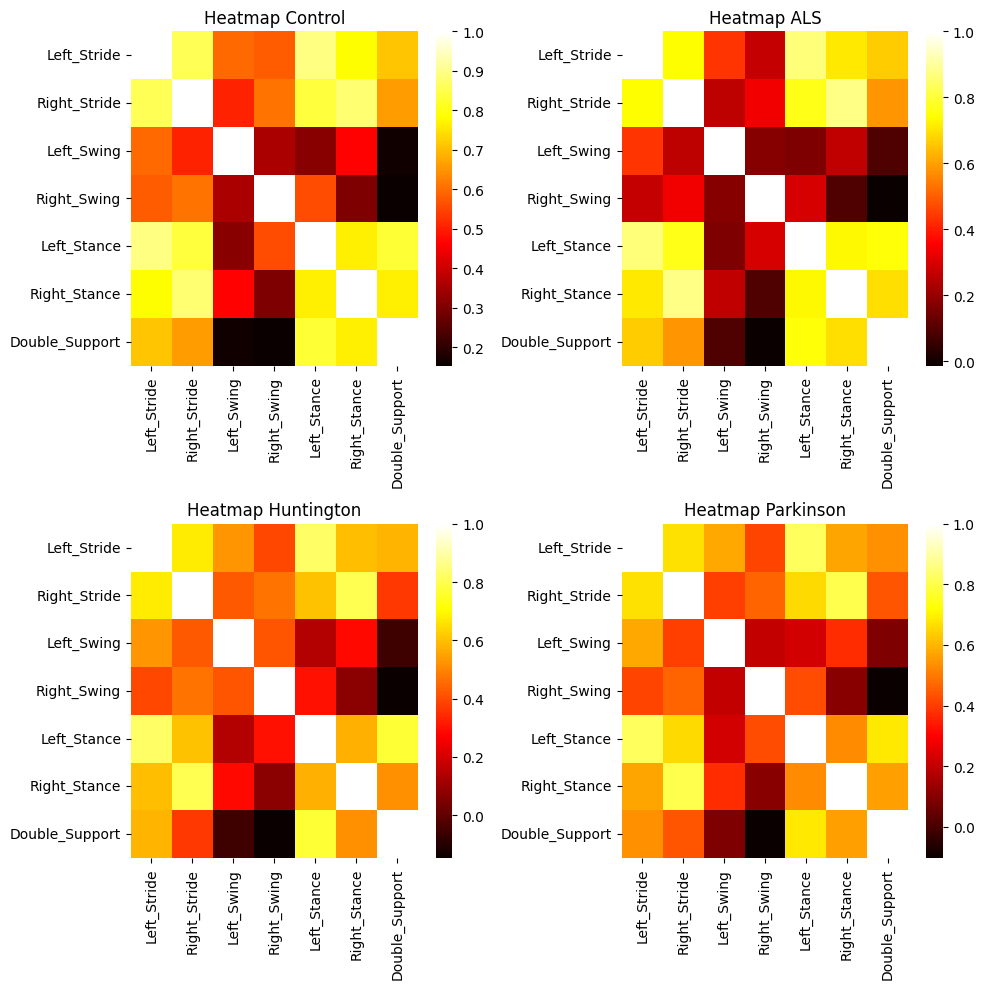

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(mean_corr_control,cmap='hot', ax=axes[0, 0])
axes[0, 0].set_title("Heatmap Control")

sns.heatmap(mean_corr_als,cmap='hot', ax=axes[0, 1])
axes[0, 1].set_title("Heatmap ALS")

sns.heatmap(mean_corr_park,cmap='hot', ax=axes[1, 0])
axes[1, 0].set_title("Heatmap Huntington")

sns.heatmap(mean_corr_hunt,cmap='hot', ax=axes[1, 1])
axes[1, 1].set_title("Heatmap Parkinson")

plt.tight_layout()
plt.show()

# Elección de umbral

## Estadisticos Control

NameError: name 'estats' is not defined

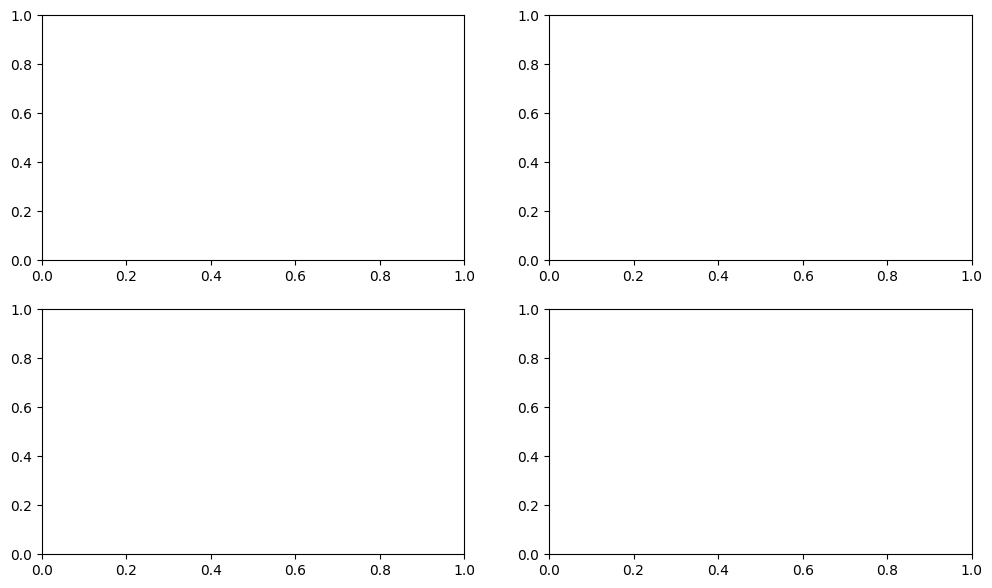

In [8]:
fig, axes=plt.subplots(2,2, figsize=(12,7))
th25_5, th50_5, th75_5, promedio_5, varianza_5, mu_sigma_5=estats(mean_corr_control)
#Plots
for sujeto in ensayos5_dfs:
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
    
axes[1][0].plot(th25_5,label='Percentil al 25%')
axes[1][0].plot(th50_5,label='Percentil al 50%')
axes[1][0].plot(th75_5,label='Percentil al 75%')
axes[1][0].plot(promedio_5,label='Media')
axes[1][0].plot(varianza_5,label='Varianza')
axes[1][0].plot(mu_sigma_5,label='mu+sigma')
axes[1][0].legend()

# Grafo    

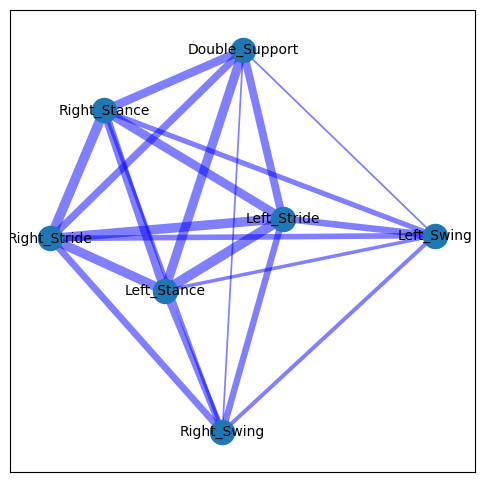

In [66]:
def grafo_nodirigido(matriz):
    A = matriz.copy()
    np.fill_diagonal(A.to_numpy(), 0)
    thr = 0.1
    A[np.abs(A) < thr] = 0
    G=nx.from_pandas_adjacency(A, create_using=nx.Graph)
    
    plt.figure(figsize=(6,6))
    pos=nx.spring_layout(G)
    pesos=nx.get_edge_attributes(G,'weight')
    edge_widths = [abs(w) * 8 for w in pesos.values()]
    edge_colors = ['blue' if w >= 0 else 'red' for w in pesos.values()]
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G,pos,edge_color=edge_colors,width=edge_widths,alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    plt.show()

In [13]:
def grafo_nodirigido(matriz,ax, pos):
    A = matriz.copy()
    np.fill_diagonal(A.to_numpy(), 0)
    thr = 0.4
    A[np.abs(A) < thr] = 0
    G=nx.from_pandas_adjacency(A, create_using=nx.Graph)
    
    plt.figure(figsize=(6,6))
    pos=nx.spring_layout(G)
    pesos=nx.get_edge_attributes(G,'weight')
    edge_widths = [abs(w) * 8 for w in pesos.values()]
    edge_colors = ['blue' if w >= 0 else 'red' for w in pesos.values()]
    nx.draw_networkx_nodes(G, pos,ax=ax)
    nx.draw_networkx_edges(G,pos,edge_color=edge_colors,width=edge_widths,alpha=0.5, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)
    


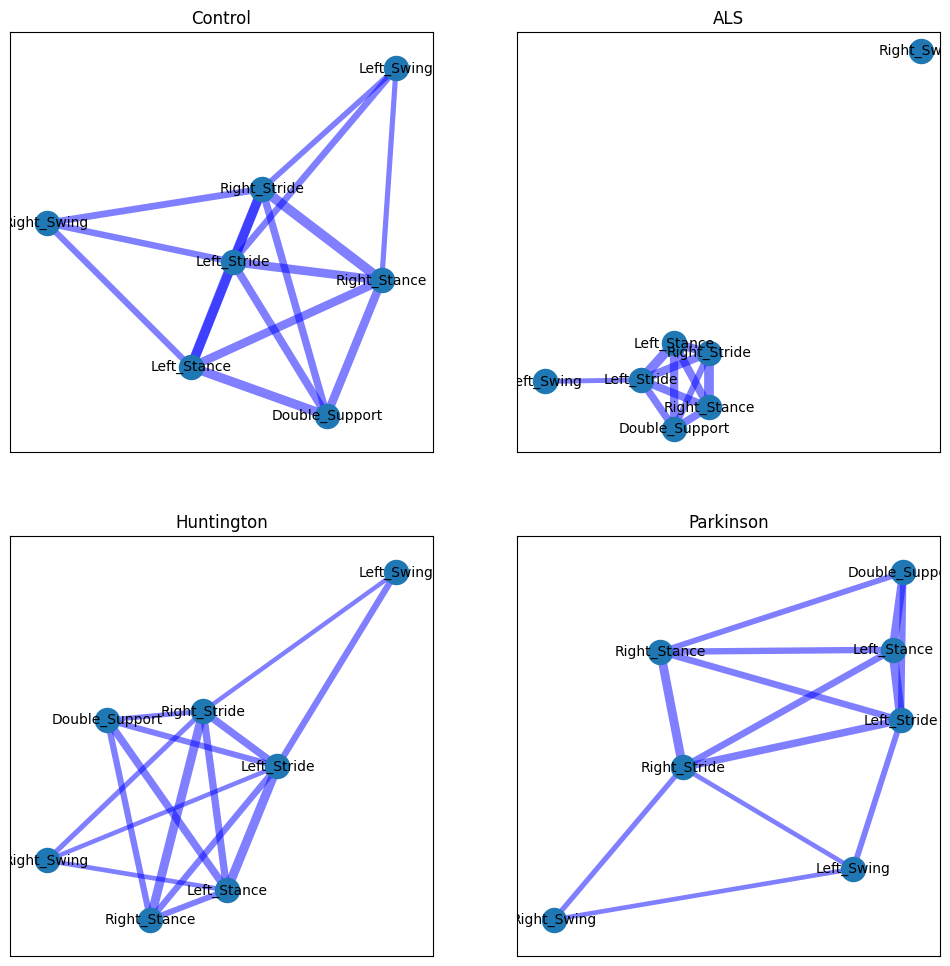

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

grafo_nodirigido(mean_corr_control, axes[0, 0])
axes[0, 0].set_title("Control")

grafo_nodirigido(mean_corr_als, axes[0, 1])
axes[0, 1].set_title("ALS")

grafo_nodirigido(mean_corr_hunt, axes[1, 0])
axes[1, 0].set_title("Huntington")

grafo_nodirigido(mean_corr_park, axes[1, 1])
axes[1, 1].set_title("Parkinson")

plt.tight_layout()
plt.show()

# Métricas

In [ ]:
def metricas(G):
    #grado(num conexiones, 
    #hubs(media+desviación estandar)), 
    #coeficiente de cluster y distancias(rutas más cortas) para identificar mundo pequeño, 
    #betweenes, intermediacion, 
    #cercanía, 
    #rich club, 
    #compendio de comunidades, modularidad, 
    #ley potencia, grafo de escala libre
    # (a) Clustering promedio (coeficiente de agrupamiento)
    clust_coeff = nx.average_clustering(G)
    # (b) Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan  # red no conexa
    # (c) Small-worldness (ejemplo simplificado)
    # Comparar con grafo aleatorio de igual N, K
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)
    
    # (d) Modularidad — usando método de comunidades
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    
    # (e) Hubs — grado, centralidad de intermediación
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    
    # (f) Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    return df=pd.DataFrame(columns=grado, hubs,clust, dist, mp, btw, clsn, rich, comm)

In [13]:
def metricas_grafo(G):
    # Métricas:
    # (a) Clustering promedio (coeficiente de agrupamiento)
    clust_coeff = nx.average_clustering(G)
    # (b) Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan  # red no conexa
    # (c) Small-worldness (ejemplo simplificado)
    # Comparar con grafo aleatorio de igual N, K
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)
    
    # (d) Modularidad — usando método de comunidades
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    
    # (e) Hubs — grado, centralidad de intermediación
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    
    # (f) Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    df = pd.DataFrame({
            "clustering": [clust_coeff],
            "path_length": [path_length],
            "small_world_sigma": [small_world_sigma],
            "modularity": [modularity],
            "global_efficiency": [global_eff],
            "local_efficiency": [local_eff],
            "degree": [degree_dict],                 # diccionario
            "betweenness": [betweenness],       # diccionario
            "communities": [list(communities)]  # lista de sets
        })

    return df


In [12]:
def metricas_grafo(G):
    # Métricas:
    # (a) Clustering promedio (coeficiente de agrupamiento)
    clust_coeff = nx.average_clustering(G)
    # (b) Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan  # red no conexa
    # (c) Small-worldness (ejemplo simplificado)
    # Comparar con grafo aleatorio de igual N, K
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)
    
    # (d) Modularidad — usando método de comunidades
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    
    # (e) Hubs — grado, centralidad de intermediación
    degree_dict = dict(G.degree())
    betweenness = nx.betweenness_centrality(G)
    
    # (f) Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    return clust_coeff, path_length, small_world_sigma, communities, modularity, betweenness, global_eff, local_eff, degree_dict



In [93]:
clust_coeff, path_length, small_world_sigma, communities, modularity, betweenness, global_eff, local_eff, degree_dict=metricas_grafo(G_control)

In [94]:
clust_coeff

1.0

In [95]:
communities

[frozenset({'Left_Stride'}),
 frozenset({'Right_Stride'}),
 frozenset({'Left_Swing'}),
 frozenset({'Right_Swing'}),
 frozenset({'Left_Stance'}),
 frozenset({'Right_Stance'}),
 frozenset({'Double_Support'})]

In [96]:
modularity

0.21186922539172012

In [97]:
degree_dict

{'Left_Stride': 8,
 'Right_Stride': 8,
 'Left_Swing': 8,
 'Right_Swing': 8,
 'Left_Stance': 8,
 'Right_Stance': 8,
 'Double_Support': 8}

In [14]:
A1= mean_corr_control.copy()
np.fill_diagonal(A1.to_numpy(), 0)
thr = 0.4
A1[np.abs(A1) < thr] = 0

A2= mean_corr_als.copy()
np.fill_diagonal(A2.to_numpy(), 0)
A2[np.abs(A2) < thr] = 0

A3= mean_corr_hunt.copy()
np.fill_diagonal(A3.to_numpy(), 0)
A3[np.abs(A3) < thr] = 0

A4= mean_corr_park.copy()
np.fill_diagonal(A4.to_numpy(), 0)
A4[np.abs(A4) < thr] = 0

G_control=nx.from_pandas_adjacency(A1, create_using=nx.Graph)
G_als=nx.from_pandas_adjacency(A2, create_using=nx.Graph)
G_hunt=nx.from_pandas_adjacency(A3, create_using=nx.Graph)
G_park=nx.from_pandas_adjacency(A4, create_using=nx.Graph)

df_control= metricas_grafo(G_control)
df_als= metricas_grafo(G_als)
df_hunt= metricas_grafo(G_hunt)
df_park= metricas_grafo(G_park)

df_metricas = pd.concat([
    df_control.assign(condicion="control"),
    df_als.assign(condicion="ALS"),
    df_hunt.assign(condicion="Huntington"),
    df_park.assign(condicion="Parkinson")
], ignore_index=True)

df_metricas

,clustering,path_length,small_world_sigma,modularity,global_efficiency,local_efficiency,degree,betweenness,communities,condicion
0,0.847619,1.238095,1.119497,-1.110223e-16,0.880952,0.923810,"{'Left_Stride': 6, 'Right_Stride': 6, 'Left_Sw...","{'Left_Stride': 0.12222222222222222, 'Right_St...","[(Right_Stance, Left_Stride, Right_Swing, Righ...",control
1,0.657143,NaN,NaN,-9.456283e-03,0.619048,0.657143,"{'Left_Stride': 5, 'Right_Stride': 4, 'Left_Sw...","{'Left_Stride': 0.26666666666666666, 'Right_St...","[(Right_Stride, Double_Support, Right_Stance, ...",ALS
2,0.857143,1.285714,1.428571,-1.110223e-16,0.857143,0.928571,"{'Left_Stride': 6, 'Right_Stride': 6, 'Left_Sw...","{'Left_Stride': 0.17777777777777776, 'Right_St...","[(Double_Support, Right_Stance, Right_Stride, ...",Huntington
3,0.776190,1.428571,1.750741,1.109286e-01,0.801587,0.880952,"{'Left_Stride': 5, 'Right_Stride': 5, 'Left_Sw...","{'Left_Stride': 0.18888888888888888, 'Right_St...","[(Left_Stride, Double_Support, Right_Stance, L...",Parkinson


In [20]:
df_grados=pd.DataFrame(df_metricas['degree'])
df_grados

,degree
0,"{'Left_Stride': 6, 'Right_Stride': 6, 'Left_Sw..."
1,"{'Left_Stride': 5, 'Right_Stride': 4, 'Left_Sw..."
2,"{'Left_Stride': 6, 'Right_Stride': 6, 'Left_Sw..."
3,"{'Left_Stride': 5, 'Right_Stride': 5, 'Left_Sw..."


In [15]:
df_metricas['communities']

0    [(Right_Stance, Left_Stride, Right_Swing, Righ...
1    [(Right_Stride, Double_Support, Right_Stance, ...
2    [(Double_Support, Right_Stance, Right_Stride, ...
3    [(Left_Stride, Double_Support, Right_Stance, L...
Name: communities, dtype: object

In [16]:
df_metricas['communities'][1]

[frozenset({'Double_Support', 'Left_Stance', 'Right_Stance', 'Right_Stride'}),
 frozenset({'Left_Stride', 'Left_Swing'}),
 frozenset({'Right_Swing'})]

In [17]:
df_metricas['communities'][0]

[frozenset({'Double_Support',
            'Left_Stance',
            'Left_Stride',
            'Left_Swing',
            'Right_Stance',
            'Right_Stride',
            'Right_Swing'})]

In [18]:
df_metricas['communities'][2]

[frozenset({'Double_Support',
            'Left_Stance',
            'Left_Stride',
            'Left_Swing',
            'Right_Stance',
            'Right_Stride',
            'Right_Swing'})]

In [19]:
df_metricas['communities'][3]

[frozenset({'Double_Support', 'Left_Stance', 'Left_Stride', 'Right_Stance'}),
 frozenset({'Left_Swing', 'Right_Stride', 'Right_Swing'})]

In [21]:
rows = []

for _, fila in df_metricas.iterrows():
    condicion = fila["condicion"]
    degree_dict = fila["degree"]

    for nodo, grado in degree_dict.items():
        rows.append({
            "condicion": condicion,
            "nodo": nodo,
            "grado": grado
        })

df_grados = pd.DataFrame(rows)

In [23]:
df_grados_wide = df_grados.pivot(index="nodo", columns="condicion", values="grado")
df_grados_wide

condicion,ALS,Huntington,Parkinson,control
nodo,,,,
Double_Support,4,4,3,4
Left_Stance,4,5,4,5
Left_Stride,5,6,5,6
Left_Swing,1,2,3,3
Right_Stance,4,4,4,5
Right_Stride,4,6,5,6
Right_Swing,0,3,2,3


In [26]:
rows = []

for _, fila in df_metricas.iterrows():
    condicion = fila["condicion"]
    betweenness_dict = fila["betweenness"]

    for nodo, grado in betweenness_dict.items():
        rows.append({
            "condicion": condicion,
            "nodo": nodo,
            "betweenness": grado
        })

df_betw = pd.DataFrame(rows)
df_betw_wide = df_betw.pivot(index="nodo", columns="condicion", values="betweenness")
df_betw_wide

condicion,ALS,Huntington,Parkinson,control
nodo,,,,
Double_Support,0.000000,0.000000,0.000000,0.000000
Left_Stance,0.000000,0.044444,0.038889,0.044444
Left_Stride,0.266667,0.177778,0.188889,0.122222
Left_Swing,0.000000,0.000000,0.050000,0.000000
Right_Stance,0.000000,0.000000,0.038889,0.044444
Right_Stride,0.000000,0.177778,0.283333,0.122222
Right_Swing,0.000000,0.000000,0.000000,0.000000


In [38]:
import powerlaw


degree_sequence = [d for n, d in G_control.degree()]
fit = powerlaw.Fit(degree_sequence)

alpha = fit.power_law.alpha
xmin = fit.power_law.xmin
p_value = fit.power_law.D
closeness = nx.closeness_centrality(G_control, distance=None)
rich_club = nx.rich_club_coefficient(G_control, normalized=False)


alpha, xmin, p_value, closeness, rich_club


Calculating best minimal value for power law fit
xmin progress: 66%

(np.float64(3.596797788162658),
 np.float64(3.0),
 np.float64(0.30602689750523276),
 {'Left_Stride': 1.0,
  'Right_Stride': 1.0,
  'Left_Swing': 0.6666666666666666,
  'Right_Swing': 0.6666666666666666,
  'Left_Stance': 0.8571428571428571,
  'Right_Stance': 0.8571428571428571,
  'Double_Support': 0.75},
 {0: 0.7619047619047619,
  1: 0.7619047619047619,
  2: 0.7619047619047619,
  3: 1.0,
  4: 1.0,
  5: 1.0})

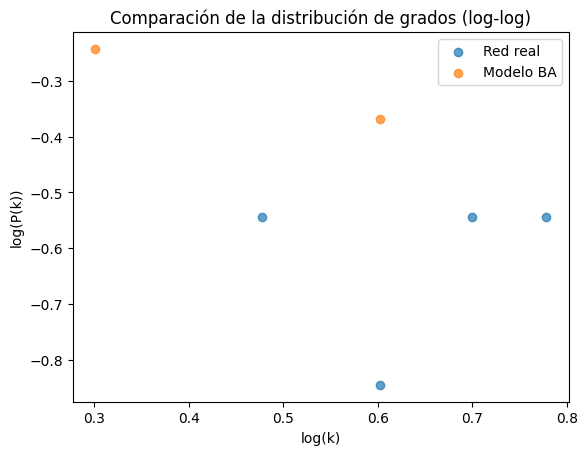

In [39]:
# Red real
deg_real = np.array([d for _, d in G_control.degree()])
k_r, c_r = np.unique(deg_real, return_counts=True)
P_r = c_r / c_r.sum()

# Red Barabasi–Albert similar
n = G_control.number_of_nodes()
m = int(np.mean(deg_real) / 2)
G_ba = nx.barabasi_albert_graph(n, m)

deg_ba = np.array([d for _, d in G_ba.degree()])
k_b, c_b = np.unique(deg_ba, return_counts=True)
P_b = c_b / c_b.sum()

plt.scatter(np.log10(k_r), np.log10(P_r), label="Red real", alpha=0.7)
plt.scatter(np.log10(k_b), np.log10(P_b), label="Modelo BA", alpha=0.7)
plt.xlabel("log(k)")
plt.ylabel("log(P(k))")
plt.legend()
plt.title("Comparación de la distribución de grados (log-log)")
plt.show()